# **ECS7024 Statistics for Artificial Intelligence and Data Science**

## **Introduction**


This document explores London's Underground travel patterns by separating its daily operation into six periods.

| Period     | Hours Included           |
|------------|--------------------------|
| Early      | H05, H06                 |
| **AMPeak**     | **H07, H08, H09**            |
| Interpeak  | H10, H11, H12, H13, H14, H15 |
| **PMPeak**    | **H16, H17, H18**            |
| Evening    | H19, H20, H21            |
| Late       | H22, H23, H00, H01       |

However, this report will focus on two crucial periods: the morning peak (AMPeak) and the evening peak (PMPeak).

Our analysis will be presented in a format for a reader interested in travel patterns (not computer code), focusing on practical insights. However, we have code throughout the document. The code is well documented, and we have added code descriptions at the end of the notebook. These are only for additional knowledge purposes.

**Contents:**

Part 1: Calculating Morning and Evening Peak Proportions.

  - 1.1 Creating a data frame which includes columns for Morning and Evening peak counts.

  - 1.2 Using the total exit value for each station to create further columns in the same Data Frame.

  - 1.3 Analysis of the new data frame

Part 2: Plotting and Analysing Distributions
  
  -  2.1 Distributions statistics
    - 2.1.1 The Statistics of the Distribution
  -  2.2 Review and Comment on Travel Patterns
    - 2.2.1 Histogram Analysis

Part 3: Classifying Stations for Travel Insights
  
  - 3.1 Classify stations into 'work', 'residential' and 'other'.
  - 3.2 Review

Part 4: Code Descriptions.
  
  - 4.1 Creating peak_counts data frame
  - 4.2 Creating Histograms
  - 4.3 Classifying stations

## **Part 1: Calculating Morning and Evening Peak Proportions**

**Why do Morning and Evening Peaks Matter?**

When analysing the London Underground's travel patterns, it is critical to understand the dynamics of the morning and evening peak periods. These times correspond to peak travel and commuter periods when people access the network. Investigating these peak periods offers insightful information about the flow of passengers, which can help with service enhancements, infrastructure design, and our general comprehension of how people move about the city.   

We shall thoroughly analyse these morning and evening peaks, illuminating their relevance within the larger context of London's transport system. Let us start by constructing a comprehensive picture of the morning and evening peak counts at various Underground stations, and then we will investigate their proportions relative to daily total exits.

**Note:** We use data frames to store and analyse our 'exits' data. Data frames can be seen as a table with rows and columns.

### **1.1 Creating a data frame which includes columns for Morning and Evening peak counts**

In [ ]:
# Importing the Pandas library with a convenient prefix 'pd'.
import pandas as pd

# Reading exit data from the 'hourlyExits.csv' file into a data frame, each row corresponding to a different train station.
exits = pd.read_csv('hourlyExits.csv', index_col='Station')

# Selecting the morning peak hours ('H07', 'H08', 'H09') and evening peak hours ('H16', 'H17', 'H18') for analysis.
AMPeak = exits.loc[:, ['H07', 'H08', 'H09']]
PMPeak = exits.loc[:, ['H16', 'H17', 'H18']]

# Creating a new data frame, 'peak_counts', to store exit counts during the morning and evening peak hours.
peak_counts = pd.DataFrame().assign(AMPeak=AMPeak.apply(sum, axis=1)).assign(PMPeak=PMPeak.apply(sum, axis=1))

# Displaying the 'peak_counts' data frame shows each train station's total exits during morning and evening peak hours.
peak_counts



,AMPeak,PMPeak
Station,,
Acton Town,1970,2628
Aldgate,7408,2992
Aldgate East,7618,3803
Alperton,856,1847
Amersham,424,1465
...,...,...
Wimbledon Park,497,1114
Wood Green,2165,6494
Wood Lane,1798,1766


### **1.2 Using the total exit value for each station to create further columns in the same Data Frame:**

  - The AM peak count as a proportion of the daily total for the station
  - The PM peak count as a proportion of the daily total for the station

In [ ]:
# Importing the Pandas library with a convenient prefix 'pd'.
import pandas as pd

# Reading exit data from the 'hourlyExits.csv' file into a data frame, each row corresponding to a different train station.
exits = pd.read_csv('hourlyExits.csv', index_col='Station')

# Selecting the morning peak hours ('H07', 'H08', 'H09') and evening peak hours ('H16', 'H17', 'H18') for analysis.
AMPeak = exits.loc[:, ['H07', 'H08', 'H09']]
PMPeak = exits.loc[:, ['H16', 'H17', 'H18']]

# Creating a new data frame, 'peak_counts', to store exit counts during the morning and evening peak hours.
peak_counts = pd.DataFrame().assign(AMPeak=AMPeak.apply(sum, axis=1)).assign(PMPeak=PMPeak.apply(sum, axis=1)).assign(Daily_Total=exits.apply(sum, axis=1))

# Calculating the proportion of AM peak exits and PM peak exits relative to the daily total exits and adding them as columns
peak_counts = peak_counts.assign(Prop_AM=peak_counts.AMPeak / peak_counts.Daily_Total, Prop_PM=peak_counts.PMPeak / peak_counts.Daily_Total)

# Displaying the 'peak_counts' data frame.
peak_counts

,AMPeak,PMPeak,Daily_Total,Prop_AM,Prop_PM
Station,,,,,
Acton Town,1970,2628,9362,0.210425,0.280709
Aldgate,7408,2992,16136,0.459098,0.185424
Aldgate East,7618,3803,21206,0.359238,0.179336
Alperton,856,1847,5118,0.167253,0.360883
Amersham,424,1465,3905,0.108579,0.375160
...,...,...,...,...,...
Wimbledon Park,497,1114,3296,0.150789,0.337985
Wood Green,2165,6494,18989,0.114013,0.341987
Wood Lane,1798,1766,6610,0.272012,0.267171


### **1.3 Analysis of the new data frame**

The exit counts for London Underground stations during the morning and evening rush hours are presented in the 'peak_counts' data frame. It is intended to shed light on station-specific exit patterns and how they relate to daily exit totals.

**Breakdown of peak_counts data frame:**

- `AMPeak (Morning Peak)`: This column represents the total exit counts for each station during peak hours, from 7:00 AM to 9:00 AM. The 'AMPeak' data is crucial to identify stations from where office workers commute. Suppose a station indicates a high exit count during the 'AMPeak' hours. In that case, they are likely to be situated in business or financial districts of the city, highlighting the significance of these locations in the morning commute.

- `PMPeak (Evening Peak)`: Here, we observe the total exit counts for each station during the evening peak hours, which span from 4:00 PM to 6:00 PM. 'PMPeak' hours represent the time of day when the working class or general population arrives home. Analysing these hours in more detail will provide insight into the residential hubs of the city.

- `Daily_Total`: This column provides the total daily exit counts for all hours for each station. 'Daily_Total' is our reference point to calculate the peak hour proportions. Looking at these values, we can get an overall picture of how many exits happen throughout the day.

- `Prop_AM (Morning Peak Proportion)`: 'Prop_AM' calculates the percentage of each station's daily average exits during the morning peak. This percentage displays the concentration of leaves during the morning peak and identifies the stations from which a sizable proportion of daily commuters depart.

- `Prop_PM (Evening Peak Proportion)`: 'Prop_PM' displays the percentage of daily peak exits versus all exits for each station in the evening. Higher values of 'Prop_PM' indicate that a station encounters a significant share of its daily departures during the evening peak hours, giving information about the dynamics of the evening commute.

## **Part 2: Understanding Travel Patterns through Distributions**

This section aims to delve into the distribution of peak count data from London Underground stations.

**Why do Distributions Matter?**

Distributions provide insight into how passengers navigate the London Underground. As was already noted, we can gain crucial information about how passengers move throughout the morning and evening peaks by examining these distributions. These perceptions can benefit service optimisation, capacity planning, and dealing with the particular difficulties that this complex transportation network presents.

**What to Expect?**

Our analysis focuses on the data's applications in the real world. We will present distribution statistics and visualise the data to highlight essential travel patterns. The goal is to offer insightful information to decision-makers and those interested in learning how Londoners and visitors use the Underground to make informed decisions.

Let's start by investigating the statistics of these distributions and visualising the data.

### **2.1 Distributions statistics**

In [ ]:
# Display summary statistics for the 'peak_counts' data frame
peak_counts.describe()

,AMPeak,PMPeak,Daily_Total,Prop_AM,Prop_PM
count,268.000000,268.000000,268.000000,268.000000,268.000000
mean,4549.768657,4477.555970,17194.477612,0.207132,0.298750
std,8181.784059,6276.463316,23480.190142,0.122161,0.087724
min,27.000000,239.000000,596.000000,0.045302,0.084630
25%,677.500000,1471.750000,4889.500000,0.116120,0.240947
50%,1517.000000,2622.000000,9210.000000,0.169378,0.307397
75%,4315.250000,4707.750000,19999.500000,0.266443,0.361596
max,61116.000000,59486.000000,149258.000000,0.630427,0.496079


#### **2.1.1 The Statistics of the Distribution**

We calculated the summary statistics using the `.describe()` function.

**AM Peak Hours:**

  - **AMPeak Range**: 61116 - 27 = 61089

  - **25th Percentile (Q1)**: 677.5
    - This means that 25% of the stations have an AM peak count less than or equal to 677.5.

  - **50th Percentile (Median, Q2)**: 1517.0
    - The median AM peak count is 1517.0, indicating that 50% of the stations have an AM peak count below this value.

  - **75th Percentile (Q3)**: 4315.25
    - 75% of the stations have an AM peak count less than or equal to 4315.25

  - **Interquartile Range (IQR)**: Q3 - Q1 = 4315.25 - 677.5 = 3637.75

**PM Peak Hours:**
    
  - **PMPeak Range**: 59486 - 239 = 59247
  
  - **25th Percentile (Q1)**: 1471.75
    - 25% of the stations have a PM peak count less than or equal to 1471.75
  
  - **50th Percentile (Median, Q2)**: 2622.0
    - 50% of the stations have a PM peak count below 2622.0
  
  - **75th Percentile (Q3)**: 4707.75
    - 75% of the stations have a PM peak count less than or equal to 4707.75
  
  - **Interquartile Range (IQR)**: Q3 - Q1 = 4707.75 - 1471.75 = 3236.00

**Daily_Total:**
  
  - **Daily_Total Range**: 149258 - 596 = 148662
  
  - **25th Percentile (Q1)**: 4889.5
    - 25% of the stations have a daily total exit count less than or equal to 4889.5
  
  - **50th Percentile (Median, Q2)**: 9210.0
    - 50% of the stations have a daily total exit count below 9210.0
  
  - **75th Percentile (Q3)**: 19999.5
    - 75% of the stations have a daily total exit count less than or equal to 19999.5
  
  - **Interquartile Range (IQR)**: Q3 - Q1 = 19999.5 - 4889.5 = 15110.00

**Prop_AM:**
  
  - **Prop_AM Range**: 0.630427 - 0.045302 = 0.585125
  
  - **25th Percentile (Q1)**: 0.116120
    - 25% of the stations have an AM peak proportion less than or equal to 0.116120
  
  - **50th Percentile (Median, Q2)**: 0.169378
    - 50% of the stations have an AM peak proportion below 0.169378
  
  - **75th Percentile (Q3)**: 0.266443
    - 75% of the stations have an AM peak proportion less than or equal to 0.266443
  
  - **Interquartile Range (IQR)**: Q3 - Q1 = 0.266443 - 0.116120 = 0.150323

**Prop_PM:**
  
  - **Prop_PM Range**: 0.496079 - 0.084630 = 0.411449
  
  - **25th Percentile (Q1)**: 0.240947
    - 25% of the stations have a PM peak proportion less than or equal to 0.240947
  
  - **50th Percentile (Median, Q2)**: 0.307397
    - 50% of the stations have a PM peak proportion below 0.307397
  
  - **75th Percentile (Q3)**: 0.361596
    - 75% of the stations have a PM peak proportion less than or equal to 0.361596
  
  - **Interquartile Range (IQR)**: Q3 - Q1 = 0.361596 - 0.240947 = 0.120649

### **2.2 Review and Comment on Travel Patterns**

Skewness refers to the asymmetry in the distribution of exit counts. Positive skew indicates the distribution is extended to the right, while negative skew means it is stretched to the left.

**AM Peak Exits:**

The summary data shows that the morning peak exit distribution displays a positive skew. The positive skew indicates that while a few stations manage significantly more morning peak traffic, many stations experience lesser levels. The fact that the mean (average) is higher than the median (middle value) and the median is greater than the mode (most prevalent value) makes this clear. Such skewness suggests a small number of essential stations may support a sizable share of passenger flow during the morning peak.

**PM Peak Exits:**

However, the summary data for evening peak exits shows a slight negative skew or left-skewed distribution. The negative skew indicates that many stations have a more consistent and evenly distributed exit count during the evening peak hours, with fewer outliers managing exceptionally high traffic. The median slightly exceeds the mean; however, the two values are close. This skewness suggests that during the evening peak, there is a more even distribution of passengers, with fewer stations handling most traffic.  

**Interquartile Range (IQR):**

The high IQR values for AM and PM peak exits highlight the significant variation in station exit counts. This variation suggests that certain stations see much higher traffic during rush hours than others, while others have lower traffic. The high IQR values imply a wide range of station usage patterns that reflect the various needs of commuters and tourists.

**Overall Insights:**

In summary, the skewness and IQR statistics shed light on the dynamics of travel patterns within the London Underground. The positive skew in the AM peak data suggests the concentration of passenger traffic at a few critical stations during the morning rush. In contrast, the negative skew in the PM peak data indicates a more evenly spread distribution during the evening commute.

This information is essential for optimising services, station management, and capacity planning. For instance, management can increase staffing numbers in stations with high exit rates during busy hours. This proactive approach is valuable for addressing commuter queries, managing crowds effectively, and handling critical situations. Additionally, it helps guarantee that stations are safe and effective even during heavy demand.

The upkeep of stations is another helpful application of this knowledge. High station exit rates can be important indicators of where management should concentrate facility repair efforts. It's critical to remember that while certain stations with heavy traffic demand special attention, other stations should be addressed. Instead, it emphasises the need for a balanced approach, with busier stations needing greater attention when it comes to maintenance.

**Note:** The mean median and mode comparison, which indicates the skewness of the data, is more of a rule of thumb and is only sometimes correct.


#### ***Histograms***

Text(0.5, 1.0, 'Distribution of AM peak count as a proportion of the daily total for the station')

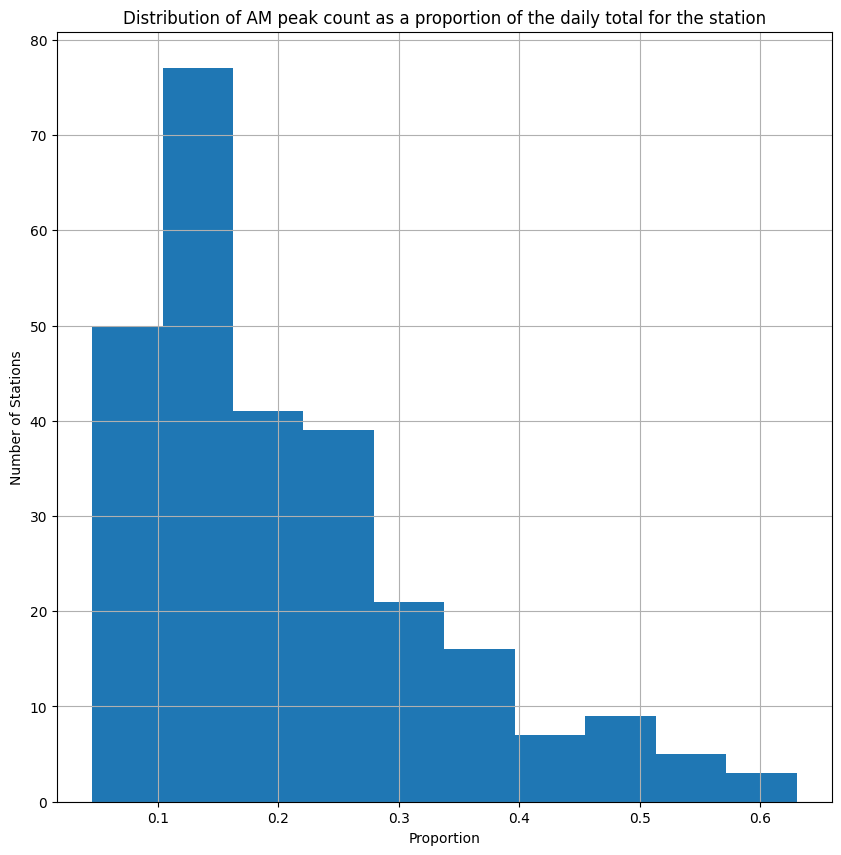

In [ ]:
import matplotlib.pyplot as plt

# creating histograms for the proportions of AM.
histograms = peak_counts.hist(figsize=(10, 10), column=['Prop_AM'], sharey=True, sharex=True)
plt.xlabel("Proportion")
plt.ylabel("Number of Stations")
plt.title("Distribution of AM peak count as a proportion of the daily total for the station")

Text(0.5, 1.0, 'Distribution of PM peak count as a proportion of the daily total for the station')

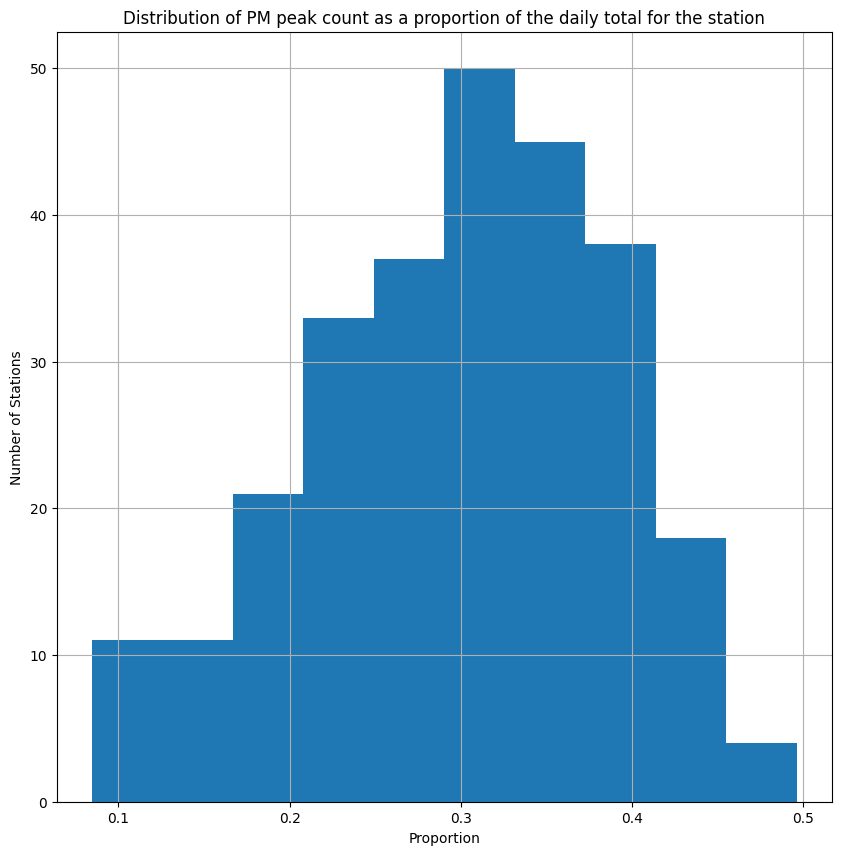

In [ ]:
# creating histograms for the proportions of PM.
histograms = peak_counts.hist(figsize=(10, 10), column=['Prop_PM'], sharey=True, sharex=True)
plt.xlabel("Proportion")
plt.ylabel("Number of Stations")
plt.title("Distribution of PM peak count as a proportion of the daily total for the station")

#### **2.2.1 Visualizing Proportions: Histogram Analysis**

To delve deeper into the distribution of exit proportions during the morning (AM) and evening (PM) peak hours, we have created histograms that visually represent the data. These histograms validate our predictions based on statistics and provide more profound insights into travel patterns within the London Underground.

**AM Proportion Histogram:**

* The AM Proportion Histogram visually represents the distribution of exit proportions during the morning peak hours.
* On the x-axis, you will find a range of AM proportion values, while the y-axis shows the frequency of these values.
* With a clear title, 'AM Proportion,' and well-labelled axes, this histogram allows for straightforward interpretation.

**PM Proportion Histogram:**

* Similarly, we have generated the PM Proportion Histogram to visualize the distribution of exit proportions during the evening peak hours.
* This histogram maintains the same x and y-axis format, displaying PM proportion values and their respective frequencies.
* The title 'PM Proportion' and the precise axis labels enhance understanding.

**Connecting Visuals to Real-World Insights:**

These histograms bridge statistics and real-world travel patterns within the London Underground. As you observe these visual representations, you can discern essential insights. The AM Proportion Histogram showcases a right-skewed distribution, reinforcing that a handful of pivotal stations experience significantly higher morning peak traffic. This aligns with the positive skew we identified earlier.

Conversely, the PM Proportion Histogram exhibits a slight left-skew, indicating a more balanced distribution of passengers across stations during the evening peak hours. This visual confirmation complements the negative skew mentioned in the statistics section, where the median was slightly higher than the mean, signifying an even distribution of traffic.

These histograms serve as invaluable tools for intuitively grasping exit proportion distributions, reinforcing the insights from summary statistics, and shedding light on the intricacies of travel patterns within the London Underground. They empower decision-makers and those interested in the network's dynamics to make informed choices for better service optimization, station management, and infrastructure planning.


## **Part 3: Classifying Stations for Travel Insights**

We have divided London Underground stations into three main groups in this section: "work," "residential," and "other." This classification gives a practical understanding of these stations' functions in commuters' and travellers' daily lives, aiding our investigation of travel patterns.

To accomplish this classification, we establish specific thresholds based on the ratio of morning peak (AM) to evening peak (PM) exit counts. These thresholds are derived from the provided data and are crucial for determining a station's predominant role. Here's a brief overview of the thresholds:

- **Work Stations:** If the ratio of AM peak exits to PM peak exits is greater than the 75th percentile of the dataset, we classify the station as 'Work.' This indicates that these stations are likely significant hubs for morning commuters heading to their workplaces.

- **Residential Stations:** Conversely, if the ratio of AM peak exits to PM peak exits falls below the 25th percentile, the station is classified as 'Residential.' This suggests that these stations are primarily where evening commuters return to their residences.

- **Other Stations:** For stations where the exit counts are more evenly distributed between the AM and PM peaks, they are classified as 'Other.' These stations might have unique purposes or diverse usage patterns.

**The Evaluation:**

Following the classification, we will evaluate how well our categorisation aligns with the stations of the Northern line. We will look at the Northern Line app sourced from https://tfl.gov.uk/maps/track/tube.

We aim to offer a comprehensive perspective on station roles and their relationship to daily travel patterns, making this section a valuable analysis component.

### **3.1 Classify stations into 'work', 'residential' and 'other'.**

In [ ]:
#peak_counts = peak_counts.assign(AMvsPM=peak_counts.AMPeak / peak_counts.PMPeak, PMvsAM=peak_counts.PMPeak / peak_counts.AMPeak)
peak_counts = peak_counts.assign(AMvsPM=peak_counts.AMPeak / peak_counts.PMPeak)

In [ ]:
# Display summary statistics for the 'peak_counts' data frame
peak_counts.describe()

,AMPeak,PMPeak,Daily_Total,Prop_AM,Prop_PM,AMvsPM
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,4549.768657,4477.555970,17194.477612,0.207132,0.298750,0.966229
std,8181.784059,6276.463316,23480.190142,0.122161,0.087724,1.148915
min,27.000000,239.000000,596.000000,0.045302,0.084630,0.108634
25%,677.500000,1471.750000,4889.500000,0.116120,0.240947,0.327530
50%,1517.000000,2622.000000,9210.000000,0.169378,0.307397,0.555720
75%,4315.250000,4707.750000,19999.500000,0.266443,0.361596,1.050702
max,61116.000000,59486.000000,149258.000000,0.630427,0.496079,7.325050


In [ ]:
# Define a function to classify stations
def classify_station(row):
    AMP = row['AMPeak']
    PMP = row['PMPeak']

    # Based on the provided data for AMvsPM
    percentile_75_AMvsPM = 1.050702
    percentile_25_AMvsPM = 0.327530

    # If the ratio of AM peak to PM peak exits is greater than the 75th percentile, classify it as 'Work'
    if AMP / PMP > percentile_75_AMvsPM:
        return 'Work'
    # If the ratio of PM peak to AM peak exits is greater than the 75th percentile, classify it as 'Residential'
    elif AMP / PMP <  percentile_25_AMvsPM :
        return 'Residential'
    # Otherwise, classify as 'Other' (when the exits in both peaks are approximately equal)
    else:
        return 'Other'

# Apply the classification function to the data frame and store the results in a new column, 'Station Type'
peak_counts['Station Type'] = peak_counts.apply(classify_station, axis=1)

# Select the stations on the Northern Line using station names as an index
northern_line = peak_counts.loc[['Archway', 'Balham', 'Embankment', 'Goodge Street', 'Highgate',
                        'High Barnet', 'Leicester Square', 'Morden', 'South Wimbledon',
                        'Tottenham Court Road', 'Warren Street']]

In [ ]:
# Display the data frame showing the new column
peak_counts

,AMPeak,PMPeak,Daily_Total,Prop_AM,Prop_PM,AMvsPM,Station Type
Station,,,,,,,
Acton Town,1970,2628,9362,0.210425,0.280709,0.749619,Other
Aldgate,7408,2992,16136,0.459098,0.185424,2.475936,Work
Aldgate East,7618,3803,21206,0.359238,0.179336,2.003155,Work
Alperton,856,1847,5118,0.167253,0.360883,0.463454,Other
Amersham,424,1465,3905,0.108579,0.375160,0.289420,Residential
...,...,...,...,...,...,...,...
Wimbledon Park,497,1114,3296,0.150789,0.337985,0.446140,Other
Wood Green,2165,6494,18989,0.114013,0.341987,0.333385,Other
Wood Lane,1798,1766,6610,0.272012,0.267171,1.018120,Other


In [ ]:
# Display the data frame containing Northern Line stations and their classifications
northern_line

,AMPeak,PMPeak,Daily_Total,Prop_AM,Prop_PM,AMvsPM,Station Type
Station,,,,,,,
Archway,2190,4106,13935,0.157158,0.294654,0.533366,Other
Balham,2637,7635,22128,0.119170,0.345038,0.345383,Other
Embankment,10692,8829,33781,0.316509,0.261360,1.211009,Work
Goodge Street,5374,1949,12817,0.419287,0.152064,2.757311,Work
Highgate,893,3170,8921,0.100101,0.355341,0.281703,Residential
High Barnet,987,2362,6843,0.144235,0.345170,0.417866,Other
Leicester Square,8952,12915,47772,0.187390,0.270347,0.693148,Other
Morden,1550,5955,15680,0.098852,0.379783,0.260285,Residential
South Wimbledon,1335,2198,7197,0.185494,0.305405,0.607370,Other


Text(0, 0.5, 'Frequency')

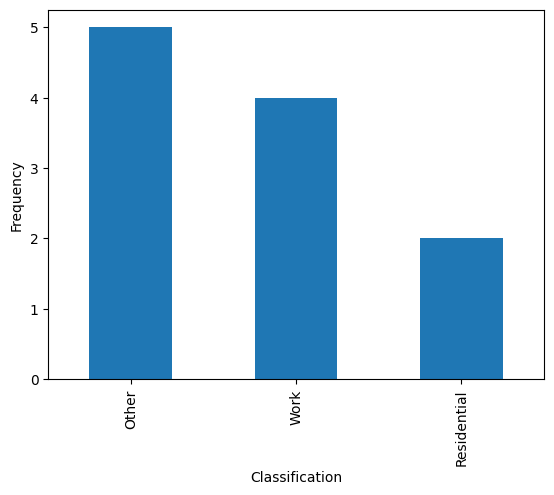

In [ ]:
# Visualise the results
import matplotlib.pyplot as plt

northern_line.loc[:,'Station Type'].value_counts().plot(kind='bar')
plt.xlabel("Classification")
plt.ylabel("Frequency")

### **3.2 Review**

**Work**:

  - We expect to see a high concentration of exits during the morning (AM) rush hour for stations closer to London's central business/financial district. Stations in this area are more likely to be classified as `Work` stations.

  - As we can see from the results, `Embankment`, `Goodge Street`, `Tottenham Court Road`, and `Warren Street` fall into this category. By looking at the map of the northern line, we can see that these stations are indeed more central. They are all in London Zone 1, encompassing its business/financial district. So we expect these stations to be classified under `Work`.

**Residential**:

  - Residential stations are frequently found in highly populated suburban regions. During the PM peak, certain stations may experience an evening rush hour, having extra exits when commuters return home from work.

  - A station's likelihood of being labelled as `Residential` increases with distance from the city centre and proximity to residential areas. Since they are in more residential neighbourhoods, stations like `Highgate` and `Morden` may fit into this group.

**Other Stations**:

  - Stations classified as `Other` might be stationed between residential and commercial sectors or in areas with both types of properties. We could conclude that stations like "Archway," "Balham," and "Leicester Square" fit this description.

*Remember that these classifications are exclusively based on exit data, meaning they might need to account for the complexity of station usage fully. We can further improve our sorts using additional data sources, such as the distance between stations and important job hubs, residential neighbourhoods, etc., to get a more precise insight.*


## ***Part 4: Code Descriptions***

#### **4.1 Creating peak counts data frame**



1. **Import pandas**:
   - The code employs the .read_csv() function from the pandas library to load data from the hourlyExits.csv file into a DataFrame named exits. The Station column is specified as the index for the DataFrame. In a data frame, the index uniquely identifies each row, serving as a label at the beginning of each row.

2. **Extracting Peak Hour Data**:
   - The code extracts data from the exits data frame for the AM peak hours ('H07,' 'H08,' 'H09') and PM peak hours ('H16,' 'H17,' 'H18') into two separate data frame: `AMPeak` and `PMPeak.` We use the `.loc[]` function to do so.

3. **Peak Exit Counts**:
   - An initial data frame named `peak_counts` is created to store the total exit counts for both AM and PM peak hours.
   - The `assign` method is used to add columns to `peak_counts`:
       - AMPeak: Sum of exit counts for the AM peak hours.
       - PMPeak: Sum of exit counts for the PM peak hours.
       - Daily_Total: Total exit counts for each station's entire day (sum of all hours).
   - The `apply` method performs a column-wise summation of exit counts.

4. **Calculating Proportions**:
   - Two additional columns are added to the peak_counts DataFrame:
       - `Prop_AM`: The proportion of AM peak exits relative to the total daily exits for each station.
       - `Prop_PM`: The proportion of PM peak exits relative to the total daily exits for each station.
   - These proportions are calculated by dividing the respective peak exit counts by the `Daily_Total` exit counts.

5. **Displaying Results**:
   - The code displays the peak_counts data frame.


### **4.2 Creating Histograms for 'Prop_AM' and 'Prop_PM' Columns**

**Code Details:**

We generate two sets of histograms for the 'Prop_AM' and 'Prop_PM' columns, each providing insights into the proportion of exits during the respective morning and evening peak hours on the London Underground. Here's how it's done:

**For 'Prop_AM' Column:**

- We create histograms for the 'Prop_AM' column using `peak_counts.hist()`.
- The `figsize=(10, 10)` parameter defines the size of the figure, providing a square layout.
- By specifying `column=['Prop_AM']`, we focus exclusively on the 'Prop_AM' data.
- `sharey=True` and `sharex=True` ensure that the y-axis and x-axis scales are shared, allowing for meaningful comparisons.
- Finally, we set the x-axis label to "Proportion," the y-axis label to "Number of Stations," and title the histogram "Distribution of AM peak count as a proportion of the daily total for the station."

**For 'Prop_PM' Column:**

- We repeat the process to create histograms for the 'Prop_PM' column.
- The parameters remain consistent, with the same figure size, shared axes, and the appropriate labels and title.

By breaking down the analysis into two separate sections, we comprehensively understand commuter behaviour and travel patterns during the morning and evening peak hours.

### **4.3 Classifying Stations**

1. **Function Definition:**

    - A function named `classify_station` is defined to classify each station based on its AM and PM peak exit counts.

3. **Classification Criteria:**

    - If the ratio of AM peak to PM peak exits exceeds `1.050702`, the station is classified as 'Work.'
    - If the PM peak to AM peak exits ratio is more significant than `0.327530`, the station is classified as 'Residential.'
    - Otherwise, it is classified as 'Other.'
    - We chose these values based on the descriptive statistics of the peak_counts data frame.
  

3. **Application of Classification:**

    - The classification function is applied to the DataFrame, and the results are stored in a new column named 'Station Type.'

5. **Selection of Northern Line Stations:**

    - A subset of stations from the Northern Line is selected using their names as an index.

7. **Resulting DataFrame:**

    - The resulting data frame, `northern_line`, contains these Northern Line stations and their classifications.